In [1]:
# Let's load the necessary packages and the data
import numpy as np
import pandas as pd
import pandas_profiling
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import time
import pprint

# Boston Marathon 2014

In [2]:
# import data 
df = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv', error_bad_lines=False)
df.head(10)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,...,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,...,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,...,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [3]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [4]:
df.shape

(31984, 21)

In [5]:
df.dropna()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
27,18.78,"Kim, Gyu Dae",15,50.33,M,30,89.52,W14,15,KOR,...,15,3.42,IL,62.72,8.98,41.82,39.65,USA,Champaign,84.75
36,19.37,"Gordian, Aaron",17,54.20,M,49,95.28,W17,17,MEX,...,18,3.65,AZ,66.62,8.93,44.82,42.47,USA,Phoenix,90.07
59,21.47,"Pulido, Jose Sr.",28,58.30,M,33,104.08,W27,28,MEX,...,34,3.98,GA,72.97,10.08,48.77,46.33,USA,Clarkesville,98.48
101,30.82,"Jami, Segundo O. Sr.",24,78.88,M,27,140.87,45,26,ECU,...,30,5.38,CO,95.97,15.23,66.28,62.78,USA,Boulder,132.67
110,32.53,"Sanca, Ruben",21,81.02,M,27,139.08,50,21,CPV,...,22,5.32,MA,97.65,16.23,68.42,64.95,USA,Lowell,131.40
112,32.12,"Troop, Lee",982,82.23,M,41,197.08,75,5000,AUS,...,5710,7.53,CO,109.23,15.68,68.73,65.15,USA,Boulder,183.08
116,33.78,"Forsyth, Ian",255,88.07,M,42,177.48,81,1753,CAN,...,1853,6.78,MI,109.23,16.75,73.08,69.00,USA,Ann Arbor,167.30
119,33.43,"Hartshorn, Chris M.",9,86.80,M,42,155.23,84,164,NZL,...,187,5.93,MA,106.13,16.40,72.47,68.55,USA,Concord,146.00
120,32.37,"Tenorio, Franklin B. Sr.",4,83.92,M,44,147.00,85,53,ECU,...,64,5.62,CO,102.08,15.77,70.20,66.45,USA,Boulder,138.65
125,36.48,"Simon, Lidia",1,92.30,F,40,156.78,F102,24,ROU,...,222,5.98,CO,111.57,18.20,77.57,73.50,USA,Boulder,148.90


In [6]:
df.shape

(31984, 21)

In [7]:
df = df[~df['5k'].str.contains('-')]
df = df[~df['10k'].str.contains('-')]
df = df[~df['20k'].str.contains('-')]
df = df[~df['25k'].str.contains('-')]
df = df[~df['30k'].str.contains('-')]
df = df[~df['35k'].str.contains('-')]
df = df[~df['40k'].str.contains('-')]
df = df[~df['half'].str.contains('-')]

df.shape

(31649, 21)

In [8]:
pandas_profiling.ProfileReport(df)

Number of variables,22
Number of observations,31649
Total Missing (%),4.7%
Total size in memory,5.3 MiB
Average record size in memory,176.0 B
Numeric,5
Categorical,14
Boolean,0
Date,0
Text (Unique),1
Rejected,2


In [9]:
# drop columns with many missing values and irrelevant data
df = df.drop(['ctz', 'state', 'bib', 'genderdiv'], axis=1)

In [10]:
# reorder the columns to make easier to read
df = df[['name', 'gender', 'age', 'city', 'country', 'overall', 'division', '5k', '10k', '20k', '25k', 'half', '30k', 
         '35k', '40k', 'official', 'pace']]
df.head()

,name,gender,age,city,country,overall,division,5k,10k,20k,25k,half,30k,35k,40k,official,pace
0,"Yamamoto, Hiroyuki",M,47,Fukuoka,JPN,8,8,8.02,17.37,37.65,47.67,39.72,59.18,71.40,80.43,85.25,3.27
1,"Jeptoo, Rita",F,33,Eldoret,KEN,21,1,16.22,32.58,65.83,82.43,69.47,99.33,116.37,132.10,138.95,5.30
2,"Van Dyk, Ernst F.",M,41,Paarl,RSA,1,1,7.75,16.62,36.10,45.80,38.03,56.45,67.42,76.10,80.60,3.08
3,"Dibaba, Mare",F,24,Shoa,ETH,27,3,16.20,32.57,65.83,82.43,69.47,99.33,116.37,132.95,140.58,5.37
4,"Hokinoue, Kota",M,40,Nogata Fukuoka,JPN,2,2,8.02,17.12,36.58,46.37,38.60,57.03,67.83,76.72,81.23,3.10


In [11]:
# counts
#df['country'].value_counts().index.to_list()

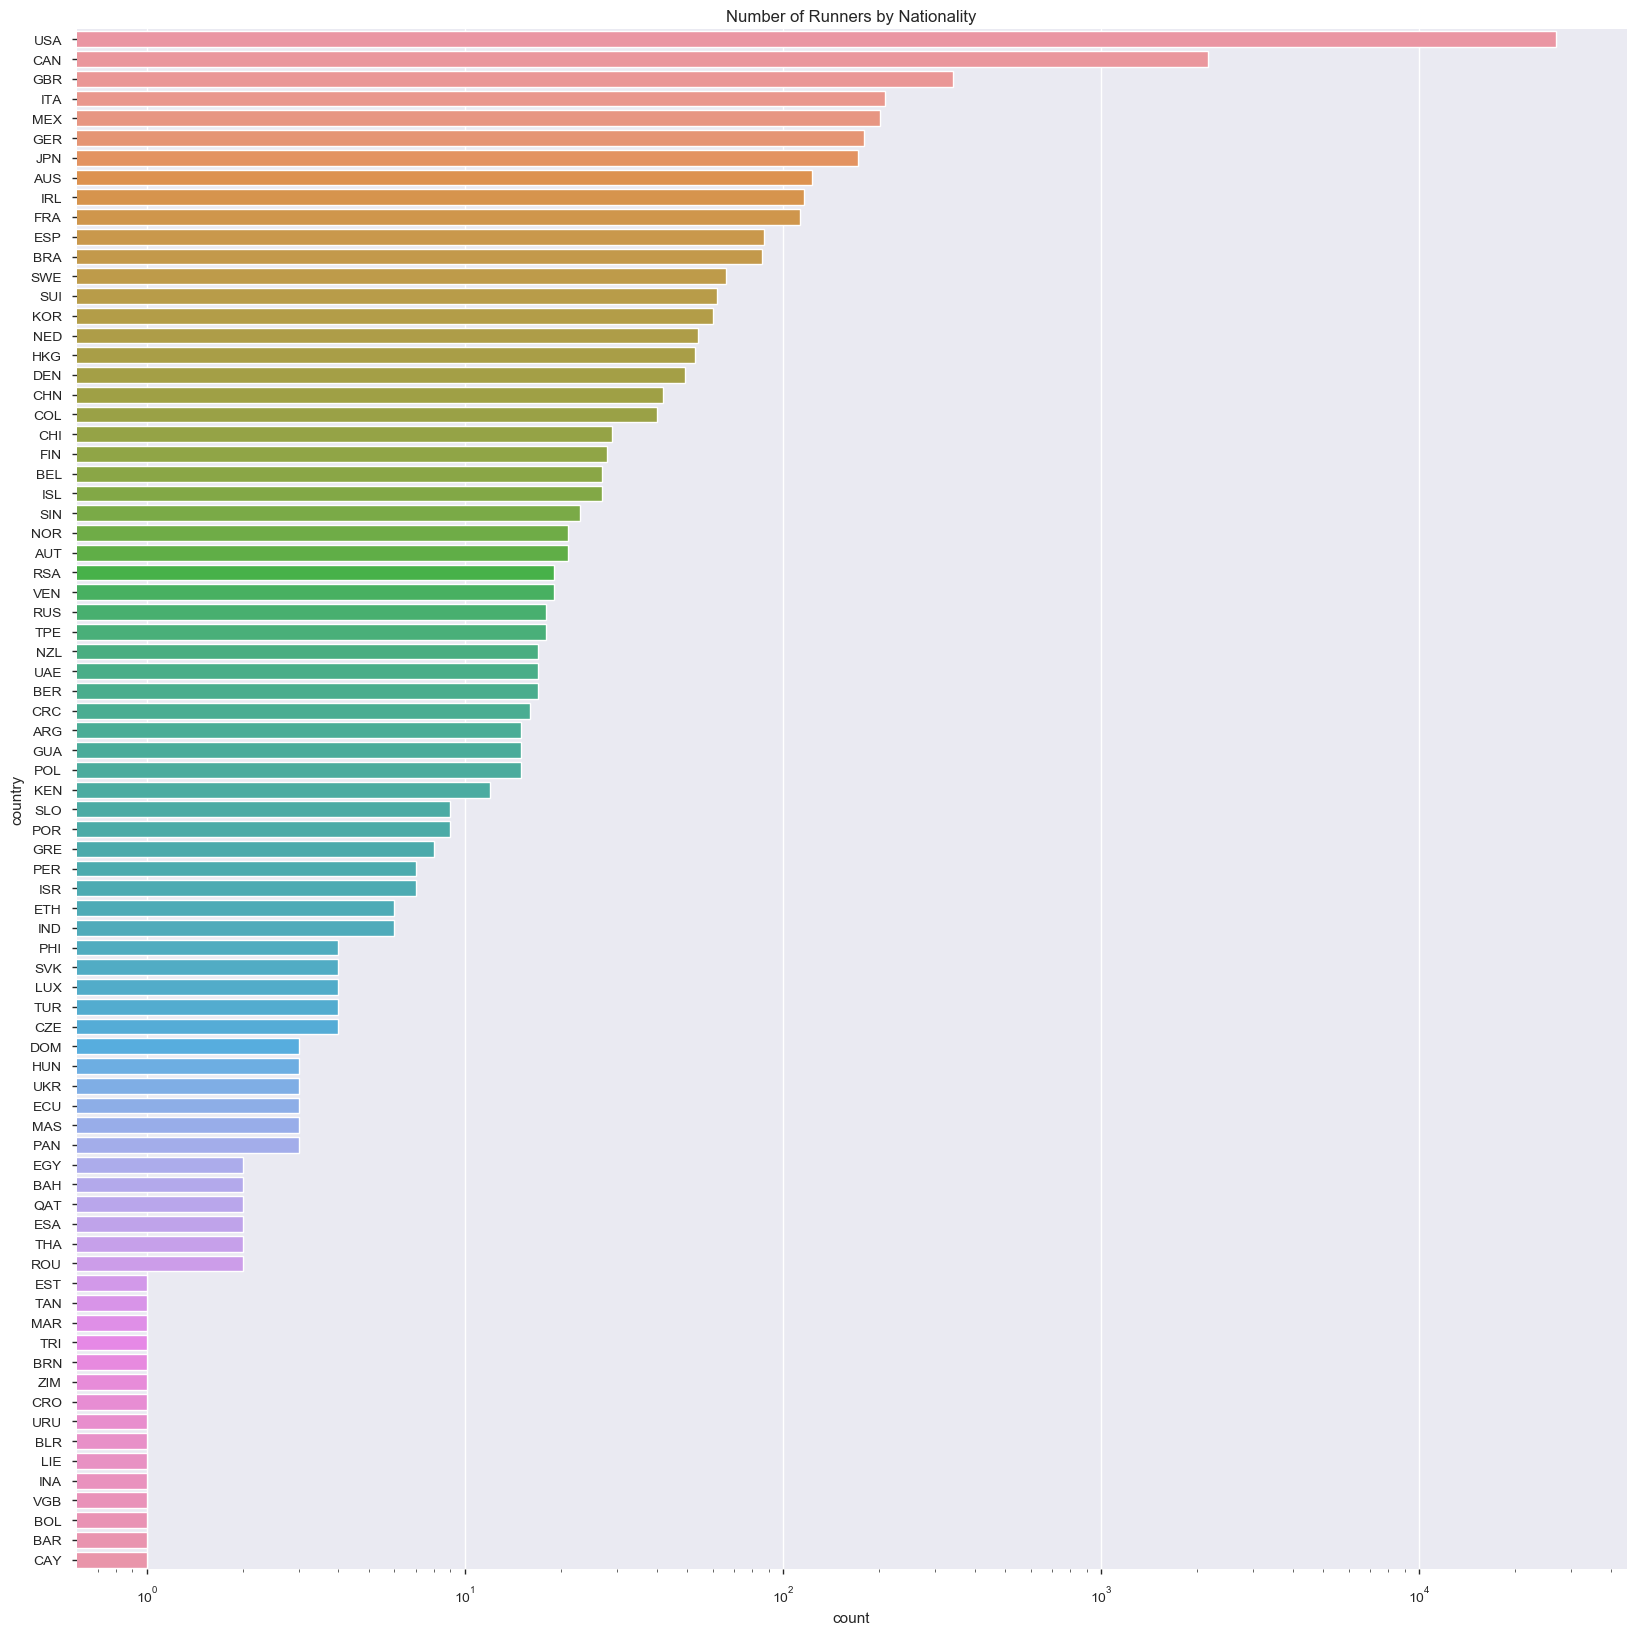

In [12]:
# Let's do some exploratory data analysis
f, ax = plt.subplots(figsize=(20, 20))
sns.set(style='whitegrid')
ax = sns.countplot(y=df['country'], data=df, order=df['country'].value_counts().index.to_list(), log=True)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Number of Runners by Nationality')
plt.show()

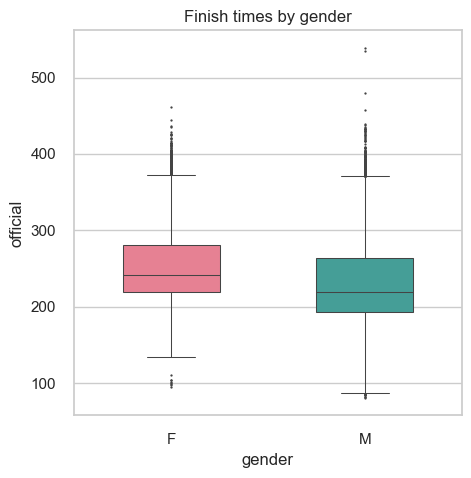

In [13]:
f, ax = plt.subplots(figsize=(5, 5))
sns.set(style='whitegrid')
sns.boxplot(x='gender', y='official', data=df, palette='husl', order=['F', 'M'], linewidth=0.75, fliersize=0.75,
            width=0.5)
plt.title('Finish times by gender')
plt.show()

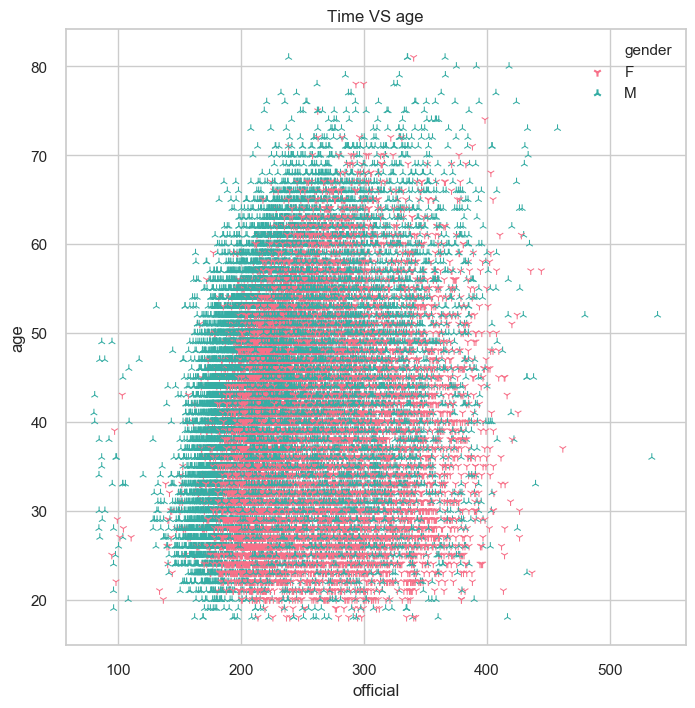

In [14]:
# age vs time
plt.subplots(figsize=(8, 8))
sns.set(style='whitegrid')
markers = {'F': '1', 'M': '2'}
sns.scatterplot(x='official', y='age', hue='gender', style='gender', hue_order=['F', 'M'], data=df, palette='husl', markers=markers)
plt.title('Time VS age')
plt.show()

In [15]:
# make a new column for age group
conditions = [
    (df['age'] < 30),
    (df['age'] >= 30) & (df['age'] < 40),
    (df['age'] >= 40) & (df['age'] < 50),
    (df['age'] >= 50) & (df['age'] < 60),
    (df['age'] >= 60) & (df['age'] < 70),
    (df['age'] >= 70)
]

# 1=20s, 2=30s, 3=40s, 4=50s, 5=60s, 6=70+
choices = [1, 2, 3, 4, 5, 6]

df['group'] = np.select(conditions, choices)

df.head()

,name,gender,age,city,country,overall,division,5k,10k,20k,25k,half,30k,35k,40k,official,pace,group
0,"Yamamoto, Hiroyuki",M,47,Fukuoka,JPN,8,8,8.02,17.37,37.65,47.67,39.72,59.18,71.40,80.43,85.25,3.27,3
1,"Jeptoo, Rita",F,33,Eldoret,KEN,21,1,16.22,32.58,65.83,82.43,69.47,99.33,116.37,132.10,138.95,5.30,2
2,"Van Dyk, Ernst F.",M,41,Paarl,RSA,1,1,7.75,16.62,36.10,45.80,38.03,56.45,67.42,76.10,80.60,3.08,3
3,"Dibaba, Mare",F,24,Shoa,ETH,27,3,16.20,32.57,65.83,82.43,69.47,99.33,116.37,132.95,140.58,5.37,1
4,"Hokinoue, Kota",M,40,Nogata Fukuoka,JPN,2,2,8.02,17.12,36.58,46.37,38.60,57.03,67.83,76.72,81.23,3.10,3


In [16]:
# first need to change gender column to numerical
df['gender'] = np.where(df['gender'] == 'M', 0, 1)
df.head()

,name,gender,age,city,country,overall,division,5k,10k,20k,25k,half,30k,35k,40k,official,pace,group
0,"Yamamoto, Hiroyuki",0,47,Fukuoka,JPN,8,8,8.02,17.37,37.65,47.67,39.72,59.18,71.40,80.43,85.25,3.27,3
1,"Jeptoo, Rita",1,33,Eldoret,KEN,21,1,16.22,32.58,65.83,82.43,69.47,99.33,116.37,132.10,138.95,5.30,2
2,"Van Dyk, Ernst F.",0,41,Paarl,RSA,1,1,7.75,16.62,36.10,45.80,38.03,56.45,67.42,76.10,80.60,3.08,3
3,"Dibaba, Mare",1,24,Shoa,ETH,27,3,16.20,32.57,65.83,82.43,69.47,99.33,116.37,132.95,140.58,5.37,1
4,"Hokinoue, Kota",0,40,Nogata Fukuoka,JPN,2,2,8.02,17.12,36.58,46.37,38.60,57.03,67.83,76.72,81.23,3.10,3


In [17]:
# see how many athletes in each category
df['group'].value_counts()

3    10097
2     7872
4     6441
1     4932
5     2080
6      227
Name: group, dtype: int64

In [18]:
# clustering time
X = df.drop(['name', 'age', 'city', 'country'], axis=1)
X.shape

(31649, 14)

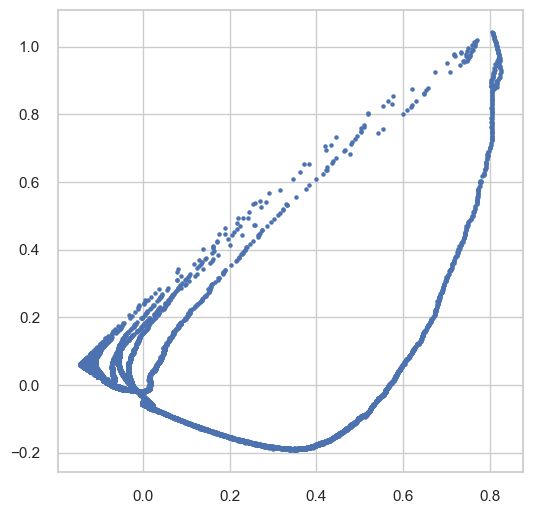

In [19]:
# normalize
plt.subplots(figsize=(6, 6))
X_norm = normalize(X)

# reduce dimensions
X_pca = PCA(n_components=2, random_state=26).fit_transform(X_norm)

plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5)
plt.show()

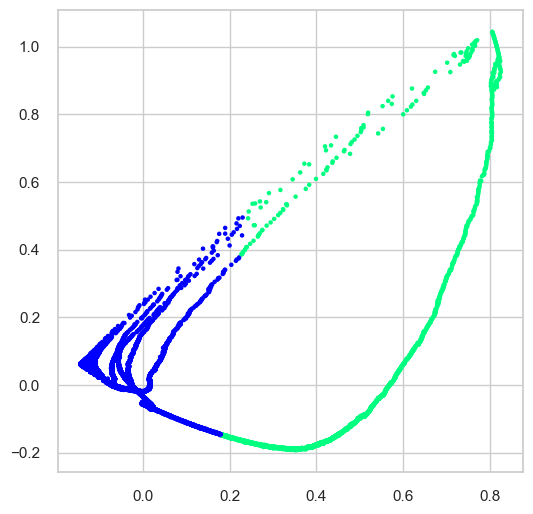

In [20]:
# K-Means
plt.subplots(figsize=(6, 6))
y_pred = KMeans(n_clusters=2, random_state=26).fit_predict(X_norm)

plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5, c=y_pred, cmap='winter')
plt.show()

In [21]:
# add cluster number to the original table
df['kmeans_cluster'] = y_pred
df.head()

,name,gender,age,city,country,overall,division,5k,10k,20k,25k,half,30k,35k,40k,official,pace,group,kmeans_cluster
0,"Yamamoto, Hiroyuki",0,47,Fukuoka,JPN,8,8,8.02,17.37,37.65,47.67,39.72,59.18,71.40,80.43,85.25,3.27,3,1
1,"Jeptoo, Rita",1,33,Eldoret,KEN,21,1,16.22,32.58,65.83,82.43,69.47,99.33,116.37,132.10,138.95,5.30,2,1
2,"Van Dyk, Ernst F.",0,41,Paarl,RSA,1,1,7.75,16.62,36.10,45.80,38.03,56.45,67.42,76.10,80.60,3.08,3,1
3,"Dibaba, Mare",1,24,Shoa,ETH,27,3,16.20,32.57,65.83,82.43,69.47,99.33,116.37,132.95,140.58,5.37,1,1
4,"Hokinoue, Kota",0,40,Nogata Fukuoka,JPN,2,2,8.02,17.12,36.58,46.37,38.60,57.03,67.83,76.72,81.23,3.10,3,1


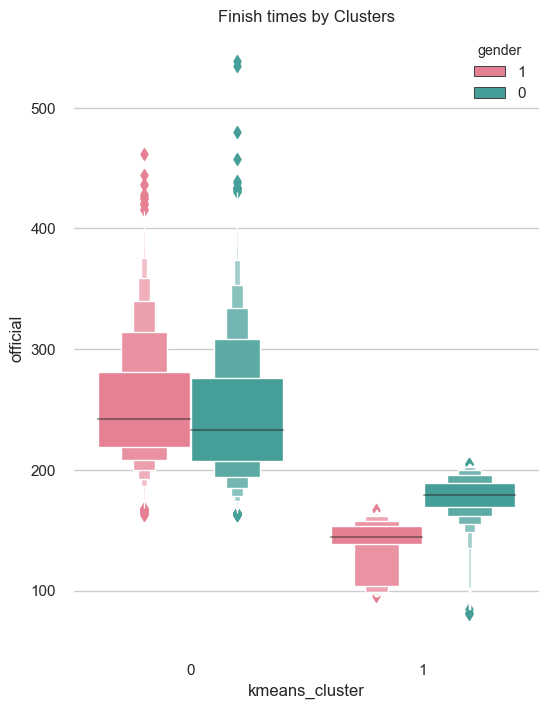

In [27]:
plt.subplots(figsize=(6, 8))
sns.set(style=('whitegrid'))
sns.despine(left=True, bottom=True)
sns.boxenplot(x='kmeans_cluster', y='official', hue='gender', data=df, palette='husl', hue_order=[1, 0])
plt.title('Finish times by Clusters')
plt.show()

Very interesting. According to these clusters, while the 'non-elite' group looks almost identical, among the 'elites' female athletes had much better mean finish time. 

In [29]:
df['kmeans_cluster'].value_counts()

0    28347
1     3302
Name: kmeans_cluster, dtype: int64

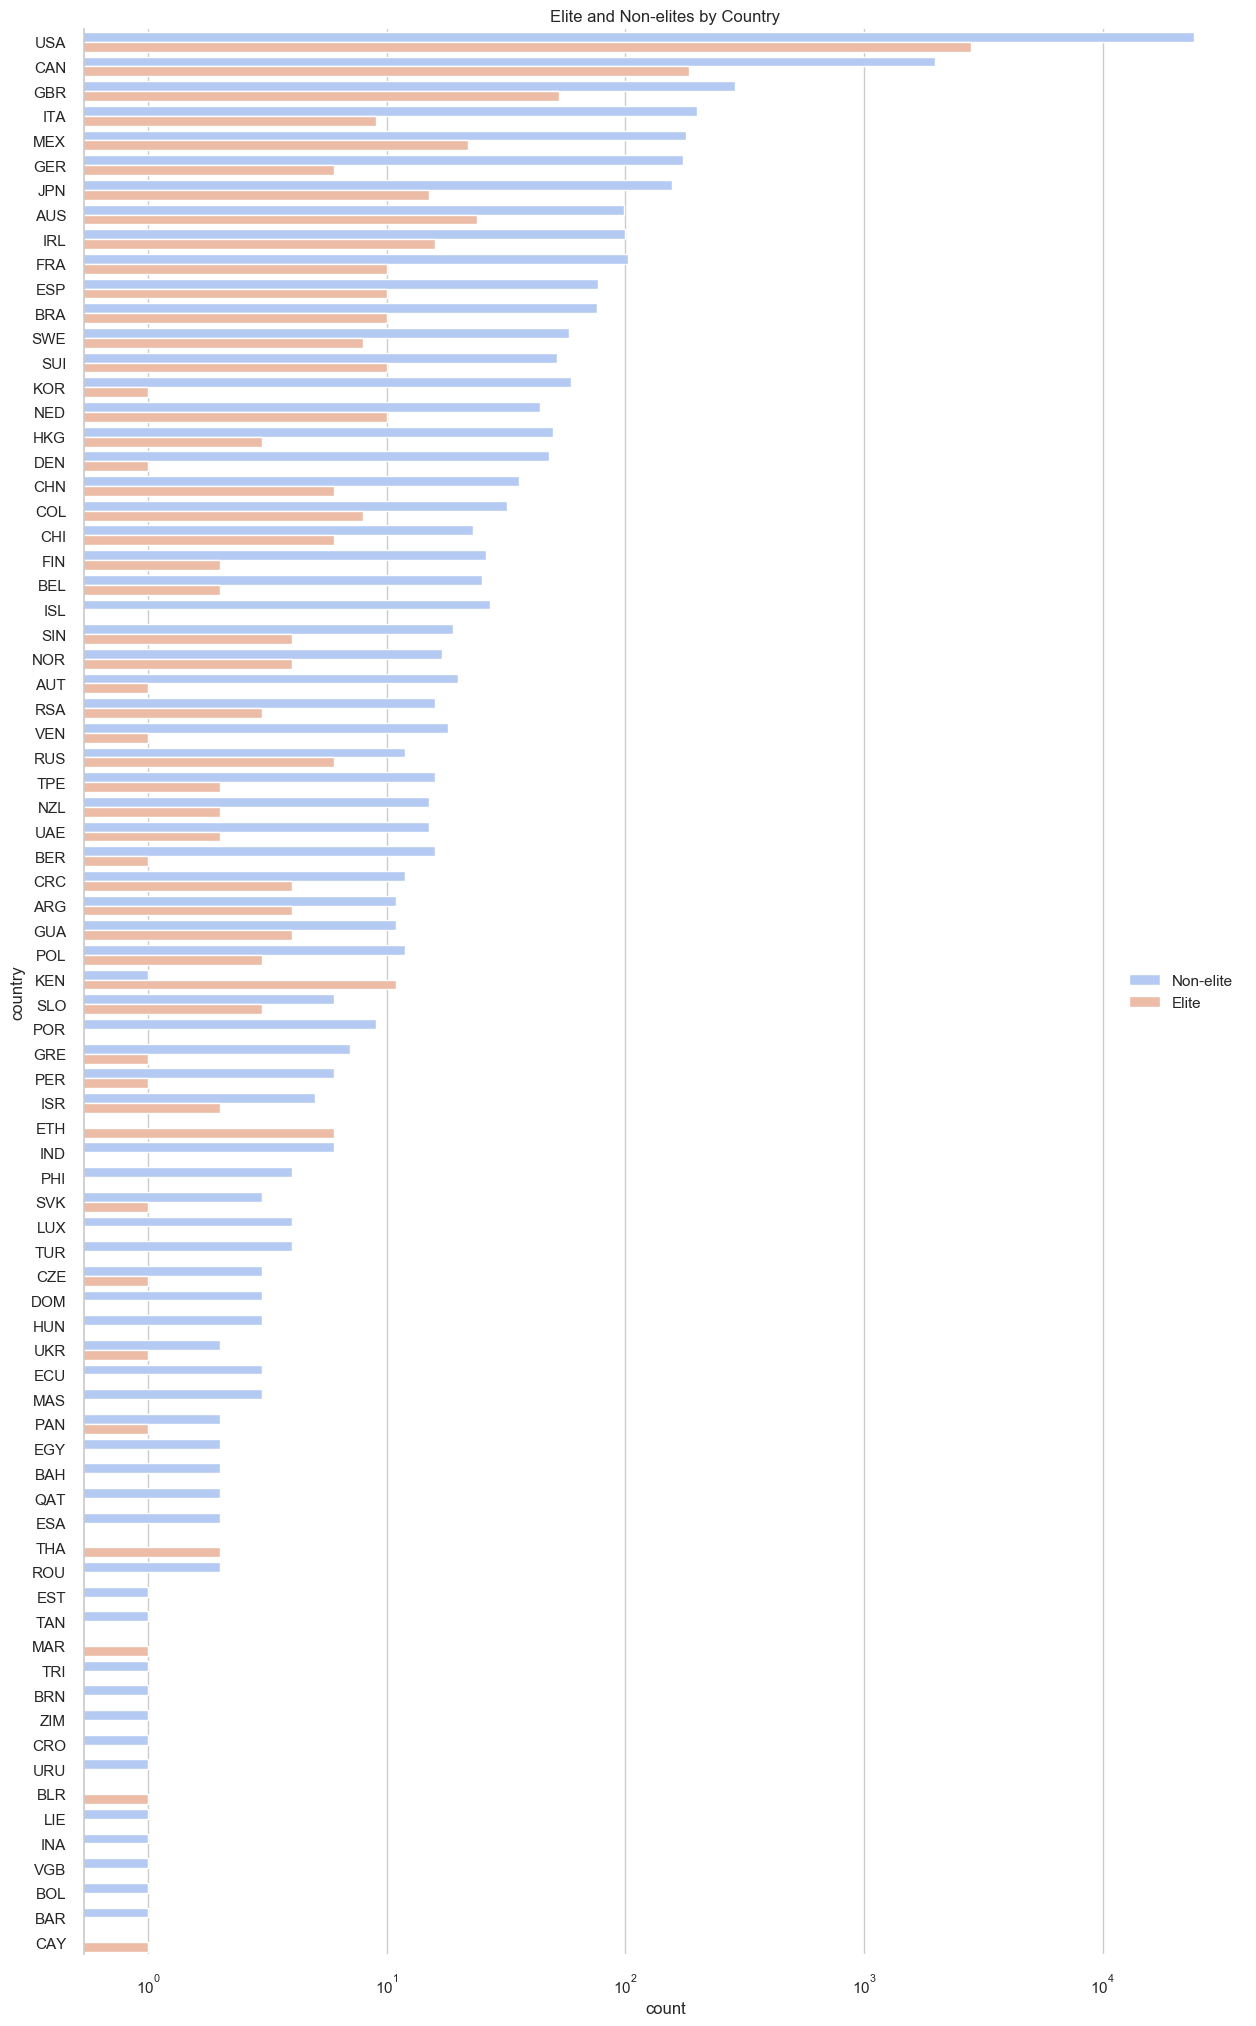

In [30]:
plt.subplots(figsize=(15, 25))
sns.set(style='whitegrid')
sns.despine(bottom=True)
sns.countplot(y='country', hue='kmeans_cluster', data=df, order=df['country'].value_counts().index.to_list(), orient='v', 
              palette='coolwarm', log=True)
plt.title('Elite and Non-elites by Country')
plt.legend(['Non-elite', 'Elite'])
plt.show()

It makes sense that for most countries, non-elites far outweighs elites with the exception of Kenya, Ethiopia, and Thailand(?). Kenya and Ethiopia are countries renowned for producing elite runners but Thailand is a bit of a surprise.

Number of estimated clusters: 6


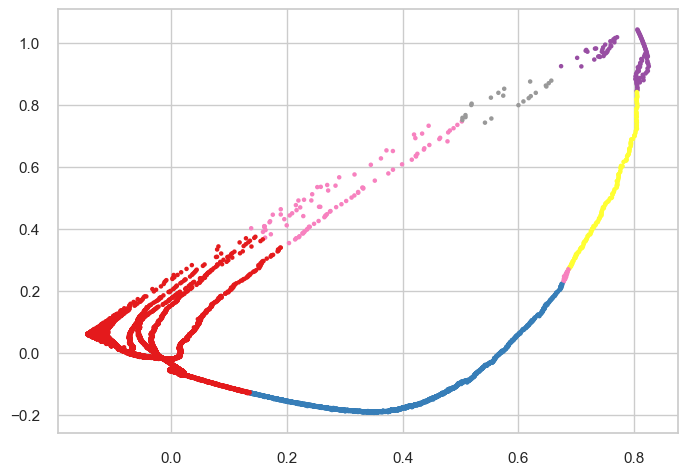

In [34]:
# Now let's try meanshift
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_norm, quantile=0.3, n_samples=1000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_norm)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=5, cmap='Set1')
plt.show()

In [36]:
df['meanshift_cluster'] = labels
df.head()

,name,gender,age,city,country,overall,division,5k,10k,20k,25k,half,30k,35k,40k,official,pace,group,kmeans_cluster,meanshift_cluster
0,"Yamamoto, Hiroyuki",0,47,Fukuoka,JPN,8,8,8.02,17.37,37.65,47.67,39.72,59.18,71.40,80.43,85.25,3.27,3,1,2
1,"Jeptoo, Rita",1,33,Eldoret,KEN,21,1,16.22,32.58,65.83,82.43,69.47,99.33,116.37,132.10,138.95,5.30,2,1,2
2,"Van Dyk, Ernst F.",0,41,Paarl,RSA,1,1,7.75,16.62,36.10,45.80,38.03,56.45,67.42,76.10,80.60,3.08,3,1,2
3,"Dibaba, Mare",1,24,Shoa,ETH,27,3,16.20,32.57,65.83,82.43,69.47,99.33,116.37,132.95,140.58,5.37,1,1,2
4,"Hokinoue, Kota",0,40,Nogata Fukuoka,JPN,2,2,8.02,17.12,36.58,46.37,38.60,57.03,67.83,76.72,81.23,3.10,3,1,2


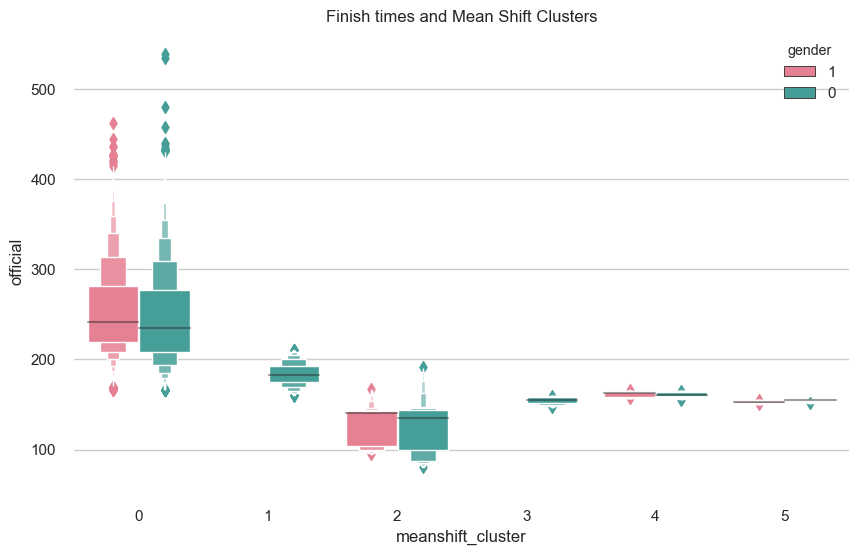

In [43]:
f, ax = plt.subplots(figsize=(10, 6))
sns.set(style='whitegrid')
sns.despine(left=True, bottom=True)
sns.boxenplot(x='meanshift_cluster', y='official', hue='gender', hue_order=[1, 0], data=df, palette='husl')
plt.title('Finish times and Mean Shift Clusters')
plt.show()

Hmm, so it looks like finish times aren't a very good indicator of how these clusters were formed.

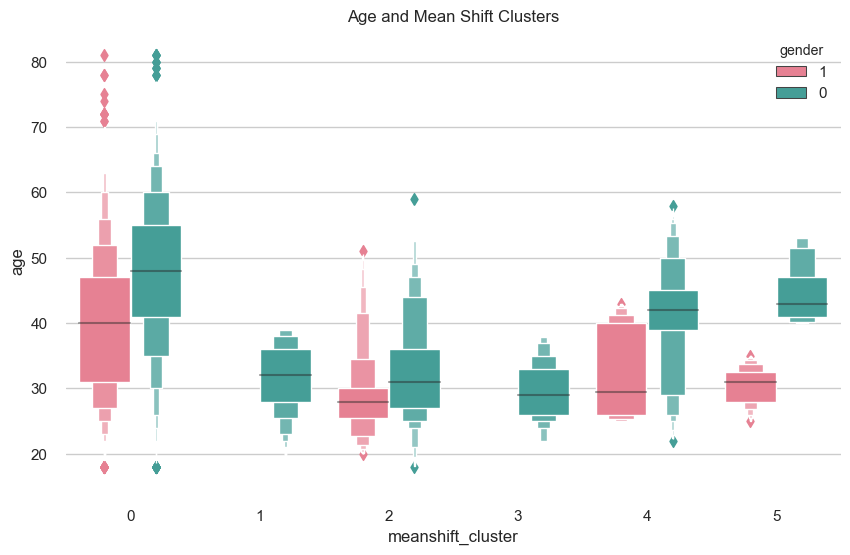

In [45]:
f, ax = plt.subplots(figsize=(10, 6))
sns.set(style='whitegrid')
sns.despine(left=True, bottom=True)
sns.boxenplot(x='meanshift_cluster', y='age', hue='gender', hue_order=[1, 0], data=df, palette='husl')
plt.title('Age and Mean Shift Clusters')
plt.show()

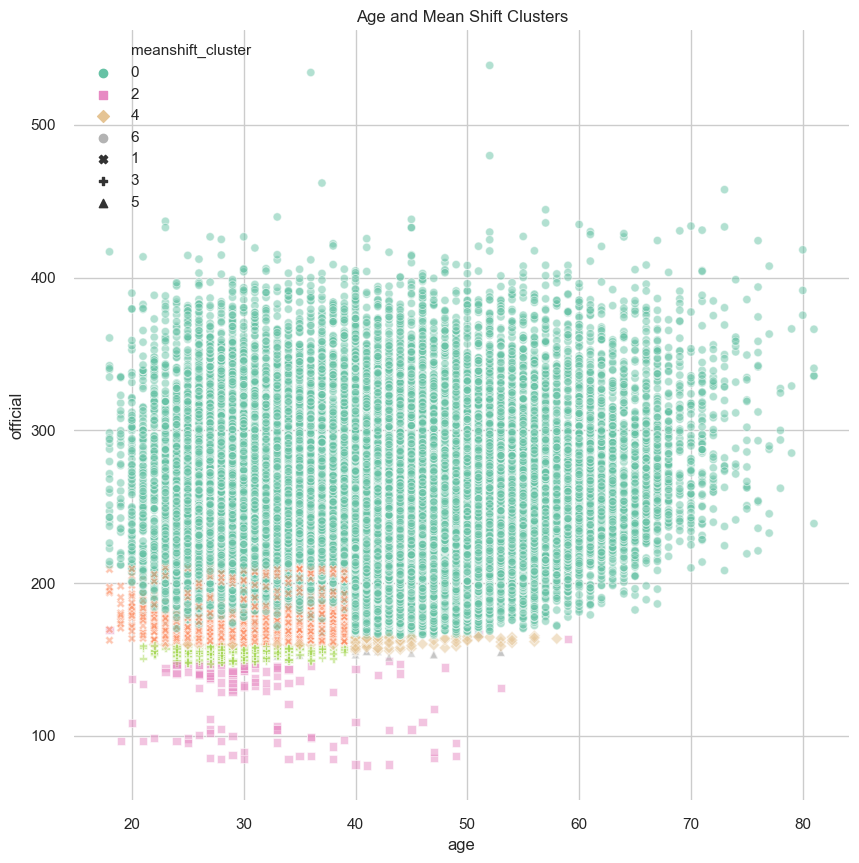

In [62]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set(style='whitegrid')
sns.despine(left=True, bottom=True)
sns.scatterplot(x='age', y='official', hue='meanshift_cluster', style='meanshift_cluster', data=df, palette='Set2', 
                alpha=0.5, x_jitter=0.5)
plt.title('Age and Mean Shift Clusters')
plt.show()